# Nonliner

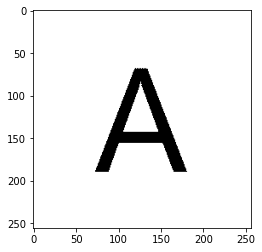

In [36]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

secret = np.logical_not(np.array(Image.open("../A_256.png").convert("1"), dtype=bool))
plt.imshow(secret, cmap="gray_r")

{'success': True, 'func': -0.2499999993424723, 'x': {'p0': array([0.50002566, 0.        , 0.49997434]), 'p1': array([0., 1., 0.]), 'r': array([0.        , 0.49997434, 1.        ])}}


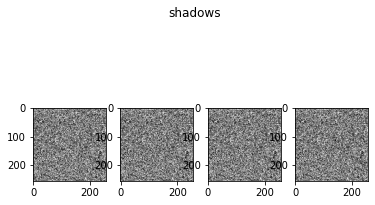

In [37]:
from optimize import optimize_nonliner
K=2
result=optimize_nonliner(K)
print(result)
if result['success']:
    p0 = result['x']['p0']  # 白色选择随机数发生器的概率
    p1 = result['x']['p1']  # 黑色选择随机数发生器的概率
    rx = result['x']['r']  # 随机数发生器输出0(False/白色)的概率

shadows = [np.zeros(secret.shape, dtype=bool) for _ in range(N)]
D = np.zeros(secret.shape, dtype=int)
for (i, j), is_black in np.ndenumerate(secret):
    prob = p1 if is_black else p0
    rand_no = np.random.choice(a=K + 1, p=prob)
    D[i, j] = rand_no
    rand_white = rx[rand_no]
    for sh in shadows:
        sh[i, j] = np.random.choice(a=[False, True], p=[rand_white, 1 - rand_white])

plt.suptitle("shadow")
    plt.subplot(1, K, i + 1)
    plt.imshow(shadows[i], cmap="gray_r")


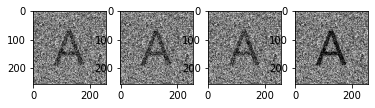

In [38]:
for i in range()
plt.subplot(1, 4, 1)
plt.imshow(np.logical_or(shadows[0], shadows[1]), cmap="gray_r")
plt.subplot(1, 4, 2)
plt.imshow(np.logical_or(shadows[1], shadows[2]), cmap="gray_r")
plt.subplot(1, 4, 3)
plt.imshow(np.logical_or(shadows[2], shadows[0]), cmap="gray_r")
plt.subplot(1, 4, 4)
plt.imshow(np.logical_or(np.logical_or(shadows[2], shadows[0]),shadows[1]), cmap="gray_r")

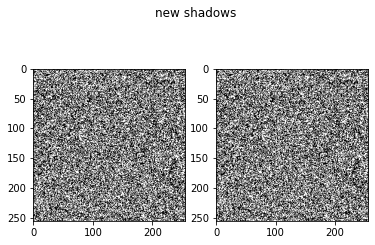

In [39]:
new_shadows = [np.zeros(secret.shape, dtype=bool) for _ in range(2)]
for (i, j), is_black in np.ndenumerate(secret):
    rand_white = rx[D[i, j]]
    for sh in new_shadows:
        sh[i, j] = np.random.choice(a=[False, True], p=[rand_white, 1 - rand_white])

plt.suptitle("new shadows")
plt.subplot(1, 2, 1)
plt.imshow(new_shadows[0], cmap="gray_r")
plt.subplot(1, 2, 2)
plt.imshow(new_shadows[1], cmap="gray_r")

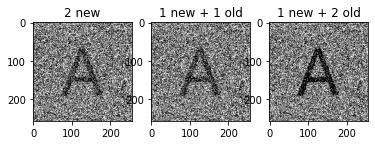

In [40]:
plt.subplot(1,3,1)
plt.title("2 new")
plt.imshow(np.logical_or(new_shadows[0],new_shadows[1]),cmap="gray_r")

plt.subplot(1,3,2)
plt.title("1 new + 1 old")
plt.imshow(np.logical_or(new_shadows[0],shadows[0]),cmap="gray_r")

plt.subplot(1,3,3)
plt.title("1 new + 2 old")
plt.imshow(np.logical_or(np.logical_or(shadows[0],shadows[1]),new_shadows[0]),cmap="gray_r")
